# Coursework 2: Network analysis

> The aim of this task is to analyse the networks, calculate basic metrics and measures using popular software, and understand the differences between networks.

*NOTE: In this coursework Amazon product co-purchasing directed network from March 12 2003 was used. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains a directed edge from i to j.*


**Environment Setup**

Commands to be run in terminal:
*Only need to run this command once*

curl http://snap.stanford.edu/data/amazon0302.txt.gz
gunzip -d amazon0302.txt.gz >> gamazon0302.txt

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.algorithms import community
import numpy
from itertools import combinations
from itertools import *
# Packages for a visualisation
import nxviz
from nxviz.plots import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot

In [2]:
# Amazon graph
G = nx.read_edgelist("amazon0312.txt", create_using=nx.DiGraph())
print("Number of edges in a real graph: " + str(G.number_of_edges()))
print("Number of nodes in a real graph: " + str(G.number_of_nodes()))

Number of edges in a real graph: 3200440
Number of nodes in a real graph: 400727


In [3]:
# Building random graph with 100 nodes and 0.02 probability for edge creation.
R = nx.gnp_random_graph(100, 0.02)
# Adding 5 self-loops
R.add_edges_from([(0, 0), (16, 16), (17, 17), (59, 59), (44, 44)])
print("Number of edges in a random graph: " + str(R.number_of_edges()))
print("Number of nodes in a random graph: " + str(R.number_of_nodes()))

Number of edges in a random graph: 104
Number of nodes in a random graph: 100


In [4]:
# Define self-loops
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    # Iterate over all the edges of G
    for u, v in G.edges():
        # Check if node u and node v are the same
        if u == v:
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
    return nodes_in_selfloops

In [5]:
print("Number of self-loops in a real graph: " + str(G.number_of_selfloops()))
print("Number of self-loops in a random graph: " + str(R.number_of_selfloops()))

Number of self-loops in a real graph: 0
Number of self-loops in a random graph: 5


In [6]:
# Degree counts how many neighbors a node has
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
# Print the degrees
print("Example of degrees:")
print(degrees[1:20])

from scipy import stats
print(stats.describe(degrees))

def most_common(lst):
    return max(set(lst), key=lst.count)
print("Most common number of neighbors: " + str(most_common(degrees)))

Example of degrees:
[5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
DescribeResult(nobs=400727, minmax=(0, 10), mean=7.986584382884108, variance=9.436128121565321, skewness=-1.2335926719134538, kurtosis=0.12559027953441904)
Most common number of neighbors: 10


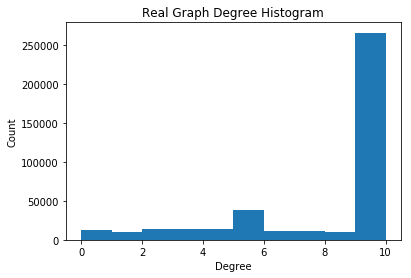

In [7]:
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.title("Real Graph Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

As can be seen, min and max number of neighbors are 0 and 10, which means that in a real life the number of recommended products vary from 0 to 10. 0 is propably shown when the product is new and system has not got any statistics to build recommendations (the problem of cold start) or the product is very unique. The majority of products has 10 neigbours, the number of products limited by an interface of a website to show.

In [8]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    # Iterate over all nodes in G
    for n in G.nodes():
        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:
            # Add the node n to the set
            nodes.add(n)
    # Return the nodes with m neighbors
    return nodes

In [9]:
# Compute and print all nodes in G that have 0 neighbors, products with the cold start ploblem or super unique
nbrs = nodes_with_m_nbrs(G, 0)
print(len(nbrs))

12353


If the network is directed, we have two versions of the measure: in-degree is the number of in-coming links, or the number of predecessor nodes; out-degree is the number of out-going links, or the number of successor nodes. Typically, we are interested in in-degree, since in-links are given by other nodes in the network, while out-links are determined by the node itself. To show the simetry, we will count both measires.

In [10]:
# Counting the number of in-coming links
in_degrees = dict(G.in_degree()) # dictionary node: degree
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]
print(len(in_degrees))

400727


In [11]:
# Counting the number of out-coming links
out_degrees = dict(G.out_degree()) # dictionary node: degree
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]
print(len(out_degrees))

400727


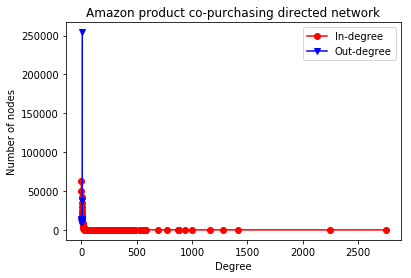

In [12]:
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon product co-purchasing directed network')
plt.show()

In [13]:
# Degree counts how many neighbors a node has
degrees = [len(list(R.neighbors(n))) for n in R.nodes()]
# Print the degrees
print("Example of degrees:")
print(degrees[1:20])

from scipy import stats
print(stats.describe(degrees))

def most_common(lst):
    return max(set(lst), key=lst.count)
print("Most common number of neighbors: " + str(most_common(degrees)))

Example of degrees:
[0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 3, 1, 3]
DescribeResult(nobs=100, minmax=(0, 7), mean=2.03, variance=1.9081818181818184, skewness=0.8241798945307919, kurtosis=0.8846101360960748)
Most common number of neighbors: 1


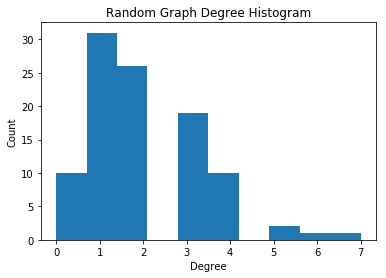

In [14]:
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.title("Random Graph Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# The degree distribution
As can be seen, the distribution looks like a famous normal distribution.

# The clustering coefficient
The clustering coefficient, when applied to a single node, is a measure of how complete the neighborhood of a node is. When applied to an entire network, it is the average clustering coefficient over all of the nodes in the network.
There are 4 different ways to define a triplet closure, to avaid redundancy, directed graph was transformed to an indirected.

In [15]:
# Compute the average clustering coefficient for the graph G
G2 = G.to_undirected()
print("Clustering coefficient in real graph is: " + str(nx.average_clustering(G2)))
print("Clustering coefficient in random graph is: " + str(nx.average_clustering(R)))

Clustering coefficient in real graph is: 0.40223455673448416
Clustering coefficient in random graph is: 0.0


As we see, the random graphs has negligible transitivity, comparing to the real data. The real network is more complete in general.

# Modularity 
Modularity is the degree to which a system's components may be separated and recombined. To identify the communities, Girvan–Newman algorithm can be used. 

In [16]:
# Trying on a random graph
communities_generator = community.girvan_newman(R)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, next_level_communities))
print(sorted_communities)

[[0, 3, 4, 7, 19, 21, 28, 32, 34, 37, 38, 43, 58, 59, 60, 62, 69, 70, 74, 75, 76, 80, 82, 83, 88, 89, 98], [1], [2, 5, 6, 9, 13, 14, 15, 16, 17, 23, 24, 27, 30, 31, 33, 35, 39, 42, 44, 45, 49, 50, 51, 52, 55, 63, 64, 66, 67, 68, 73, 81, 84, 85, 86, 87, 90, 92, 93, 96, 99], [8, 25, 26, 29, 36, 46, 48, 53, 54, 71, 79, 91], [10], [11, 95], [12], [18, 61], [20], [22, 57], [40], [41], [47], [56, 97], [65, 77], [72], [78], [94]]


In [17]:
# Generation on a real big graph works a long time
#communities_generator = community.girvan_newman(G2)
#top_level_communities = next(communities_generator)
#next_level_communities = next(communities_generator)
#sorted_communities = sorted(map(sorted, next_level_communities))
#print(sorted_communities)

In the study of networks, modularity (networks) is a benefit function that measures the quality of a division of a network into groups or communities.

In [18]:
def find_communities(graph):
    '''Find the unconnected communities.
    '''
    unclassified_nodes = set(graph.nodes())
    communities = []
    while unclassified_nodes:
        next_node = unclassified_nodes.pop()
        next_community = nx.node_connected_component(graph, next_node)
        communities.append(next_community)
        unclassified_nodes.difference_update(next_community)
    return communities

def _community_mapper(graph, communities):
    '''Return a dictionary of (node, community_key) pairs.
    '''
    community_mapper = dict([(node, [node in com for com in 
                                     communities].index(True))
                             for node in graph.nodes()])
    return community_mapper

communities = []
communities = find_communities(R)

In [19]:
def _compute_edge_matrix(graph, communities):
    '''Compute the number of edges within and between communities.
    '''
    e = numpy.zeros((len(communities), len(communities)))
    community_mapper = _community_mapper(graph, communities)
    for (node_i, node_j) in graph.edges():
        com_i = community_mapper[node_i]
        com_j = community_mapper[node_j]
        e[com_i, com_j] += 1
        if com_i != com_j:
            e[com_j, com_i] += 1
    return e

def compute_modularity(graph, communities):
    '''Compute the modularity of a graph given a community structure.
    '''
    e = _compute_edge_matrix(graph, communities)
    e /= graph.number_of_edges()
    Q = numpy.trace(e) - numpy.dot(e, e).sum()
    return Q


In [20]:
modularityR = compute_modularity(R, communities)
print("Modularity of a random graph: ", modularityR)

Modularity of a random graph:  0.093380177514793


In [21]:
communities = []
communities = find_communities(G2)
modularityG2 = compute_modularity(G2, communities)
print("Modularity of a real graph: ", modularityG2)

Modularity of a real graph:  0.0


As a result, real graph cannot be easily separated to a communities.

In [22]:
# Find all open triangles in a graph
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
            in_open_triangle = True
            break
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G, n):
        # Increment num_open_triangles
        num_open_triangles += 1
        
print("Number of all open triangles in a real graph: ", num_open_triangles)

Number of all open triangles in a real graph:  366964


In [23]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [42]:
cli = maximal_cliques(G2, 3)

In [43]:
print(cli[0:10])

[['381611', '335683', '369867'], ['381611', '360425', '290960'], ['233022', '301286', '255237'], ['25517', '77387', '33'], ['94475', '81554', '19538'], ['198226', '262337', '262338'], ['198226', '243541', '138392'], ['198226', '262340', '262338'], ['312508', '126812', '36682'], ['312508', '169832', '40536']]


In [25]:
# Compute the betweenness centrality of a random graph
bet_cenr = nx.betweenness_centrality(R)

# Compute the degree centrality of of a random graph
deg_cenr = nx.degree_centrality(R)

In [26]:
a = 0
b = 0
for i in bet_cenr:
    a += bet_cenr[i]
    b += deg_cenr[i]

print("Average betweenness centrality of a random graph: " + str(a / len(bet_cenr)))
print("Average degree centrality of a random graph: " + str(b / len(deg_cenr)))

Average betweenness centrality of a random graph: 0.030853432282003705
Average degree centrality of a random graph: 0.021010101010101007


In [27]:
# Betweenness centrality is a very slow calculation
# Compute the betweenness centrality of a real graph
#bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of of a real graph
#deg_cen = nx.degree_centrality(G)

In [ ]:
a = 0
b = 0
for i in bet_cen:
    a += bet_cen[i]
    b += deg_cen[i]

print("Average betweenness centrality of a real graph: " + str(a / len(bet_cen)))
print("Average degree centrality of a real graph: " + str(b / len(deg_cen)))

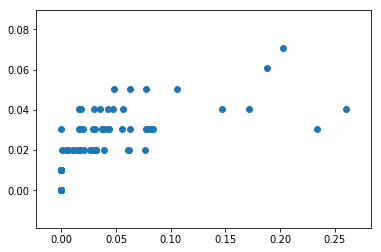

In [29]:
# Create a scatter plot of betweenness centrality and degree centrality of a random graph
plt.scatter(list(bet_cenr.values()), list(deg_cenr.values()))
plt.show()

In [30]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(R):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(R)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
            # Add the current node to the set of nodes
            nodes.add(k)
    return nodes

In [31]:
# Find the node(s) that has the highest degree centrality in random graph:
top_dc = find_nodes_with_highest_deg_cent(R)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(R)[node] == max(nx.degree_centrality(R).values())

{76}


# Visualisation of a graph

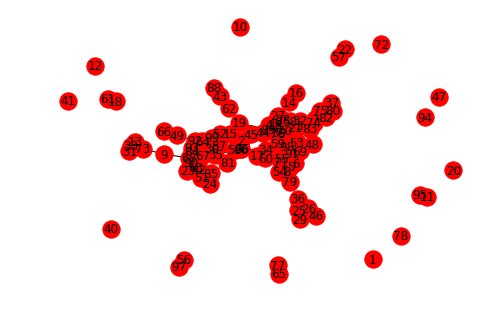

In [32]:
nx.draw(R, with_labels=True)

In [ ]:
#nx.draw(G2, with_labels=True)

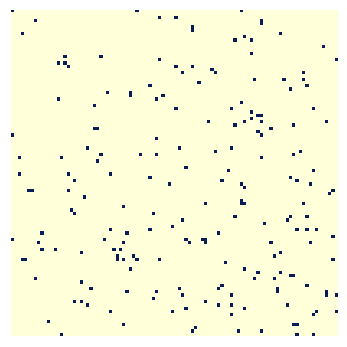

In [33]:
# Represent our random graph as a metrix
m = MatrixPlot(R)
m.draw()
plt.show()

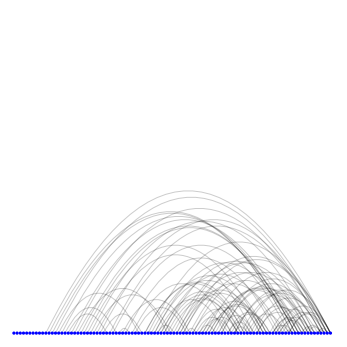

In [34]:
# Creating an ArcPlot for random data, based on degree of nodes
# Iterate over all the nodes in graph
for n, d in R.nodes(data=True):
    R.node[n]['degree'] = nx.degree(R, n)
    
# Create the ArcPlot
a = ArcPlot(graph = R, node_order='degree')
a.draw()
plt.show()

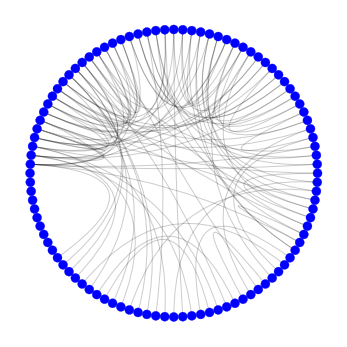

In [35]:
# Creating an CircosPlot for random data, based on degree of nodes
c = CircosPlot(R, node_order='degree')

# Draw the CircosPlot
c.draw()
plt.show()